In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import pyplot as plt
def show(img):
    plt.figure(figsize = (15,12))
    plt.imshow(img)
    plt.show()

2744 3136 1824 2736
(392, 912)


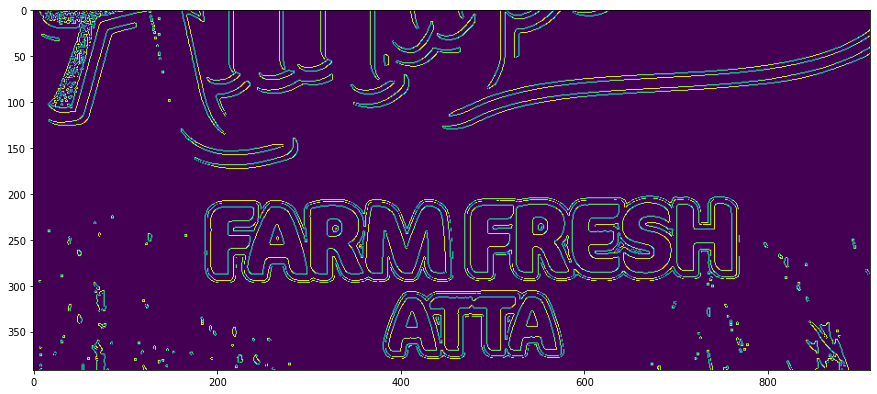

In [4]:
image = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
img = cv2.imread(image)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,45,255,cv2.THRESH_BINARY)[1]

# # Setting All parameters
t_lower = 0  # Lower Threshold
t_upper = 255  # Upper threshold
aperture_size = 5  # Aperture size
L2Gradient = True
    
# # Applying the Canny Edge filter
# # with Custom Aperture Size
edge = cv2.Canny(thresh, t_lower, t_upper, L2gradient = L2Gradient)
y, x = edge.shape

n = 8
start_x = 2
start_y = 7
edge1 = edge[start_y * y // n: (start_y + 1) * y // n, start_x * x // n:(start_x + 1) * x // n]
print(start_y * y // n, (start_y + 1) * y // n, start_x * x // n ,(start_x + 1) * x // n)
# print(edge)
print(edge1.shape)
show(edge1)

In [47]:
output = cv2.connectedComponentsWithStats(edge1, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

counts = len(np.unique(labels))
# counts

# loop over the number of unique connected component labels
for i in range(0, numLabels):
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    x_ = stats[i, cv2.CC_STAT_LEFT]
    y_ = stats[i, cv2.CC_STAT_TOP]
    w_ = stats[i, cv2.CC_STAT_WIDTH]
    h_ = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    componentMask = (labels == i).astype("uint8") * 255
	# show our output image and connected component mask
    print("x",x_,"y",y_,"w",w_,"h",h_,"area",area,"cX",cX,"cY",cY)

575

# Filter based on area > 30 

In [9]:
output = cv2.connectedComponentsWithStats(edge1, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

# loop over the number of unique connected component labels
for i in range(0, numLabels):
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    x_ = stats[i, cv2.CC_STAT_LEFT]
    y_ = stats[i, cv2.CC_STAT_TOP]
    w_ = stats[i, cv2.CC_STAT_WIDTH]
    h_ = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    keepWidth = w_ > 2
    keepHeight = h_ > 2
    keepArea = area > 50
    # ensure the connected component we are examining passes all
    # three tests
    if all((keepWidth, keepHeight, keepArea)):
        print("[INFO] keeping connected component '{}'".format(i))
        componentMask = (labels == i).astype("uint8") * 255
        cv2.imwrite(f"/home/office5/Image_Code/Ketan_sir/try1_connected_component/{i}.png",componentMask)
	

[INFO] examining component 1/575 (background)
[INFO] keeping connected component '0'
[INFO] examining component 2/575
[INFO] keeping connected component '1'
[INFO] examining component 3/575
[INFO] examining component 4/575
[INFO] examining component 5/575
[INFO] examining component 6/575
[INFO] examining component 7/575
[INFO] examining component 8/575
[INFO] keeping connected component '7'
[INFO] examining component 9/575
[INFO] examining component 10/575
[INFO] examining component 11/575
[INFO] examining component 12/575
[INFO] examining component 13/575
[INFO] keeping connected component '12'
[INFO] examining component 14/575
[INFO] examining component 15/575
[INFO] examining component 16/575
[INFO] examining component 17/575
[INFO] examining component 18/575
[INFO] examining component 19/575
[INFO] examining component 20/575
[INFO] examining component 21/575
[INFO] examining component 22/575
[INFO] keeping connected component '21'
[INFO] examining component 23/575
[INFO] keeping co

# Get extreme point

In [126]:
image_extreme = cv2.imread('/home/office5/Image_Code/Ketan_sir/try_connected_component/187.png',0)
h,w = image_extreme.shape

import cv2
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt

# Reading the image
image = cv2.imread('/home/office5/Image_Code/Ketan_sir/try_connected_component/187.png',0)

kernel2 = np.array([[0, -1, 0],
					[-1, 5, -1],
					[0, -1, 0]])					

img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)

a = [(i,j) for i in range(h) for j in range(w) if img[i][j]>0]

a[-1]

(233, 738)

# Get exact extreme point from original image

In [127]:
print(start_y * y // n, (start_y + 1) * y // n, start_x * x // n ,(start_x + 1) * x // n)

ori_img_loc_y = start_y * y // n + a[-1][0]
ori_img_loc_x = start_x * x // n  + a[-1][1]

print("X = ",ori_img_loc_x,"Y = ",ori_img_loc_y)

2744 3136 1824 2736
X =  2562 Y =  2977


# Crop Image from original image from given extreme point

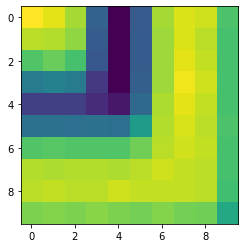

In [38]:
x1_f = ori_img_loc_x - 5
x2_f = ori_img_loc_x + 5
y1_f = ori_img_loc_y - 5
y2_f = ori_img_loc_y + 5
print(x1_f,y1_f,x2_f,y2_f)

Anna2_img = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
Anna2_img = cv2.imread(Anna2_img,0)
img_crop1  = Anna2_img[y1_f:y2_f,x1_f:x2_f]
img_first = img_crop1.astype(np.int8)
plt.imshow(img_first)

# Get extreme point for second image

Second way

3 4
2561 2975


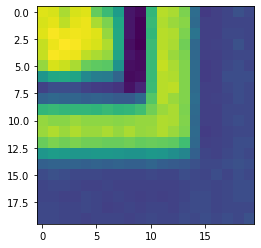

In [119]:
x1_s = ori_img_loc_x - 10
x2_s = ori_img_loc_x + 10
y1_s = ori_img_loc_y - 10
y2_s = ori_img_loc_y + 10
# print(x1_s,y1_s,x2_s,y2_s)

Anna3_img = "/home/office5/Image_Code/Ketan_sir/data/Anna28.bmp"
Anna3_img = cv2.imread(Anna3_img,0)

img_crop2  = Anna3_img[y1_s:y2_s,x1_s:x2_s]
plt.imshow(img_crop2)
img_snd = img_crop2.astype(np.int8)

dict1 = {}
for i in range(10):
    for j in range(10):
        dict1[i,j] = np.mean(np.abs(img_first  - img_snd[i:i+10,j:j+10]))
# print(dict1)
i,j = min(dict1, key=dict1.get)

print(i,j)
s_img_extr_point_x = x1_s + 10 - 5 + j # 10 for each block of first image and -5 for adding from width and height of first image
s_img_extr_point_y =y1_s + 10 - 5 + i

print(s_img_extr_point_x,s_img_extr_point_y)

In [9]:
# x1_s = ori_img_loc_x - 10
# x2_s = ori_img_loc_x + 10
# y1_s = ori_img_loc_y - 10
# y2_s = ori_img_loc_y + 10
# # print(x1_s,y1_s,x2_s,y2_s)
# df = pd.read_csv('/home/office5/Image_Code/Piyush_Sir/master.csv')

# with open('mid.csv','a') as f:
#     for i in range(len(df.index)):
#         img_name = df['File name'].iloc[i]
#         print(img_name)
#         Anna_img = f"/home/office5/Image_Code/Ketan_sir/data/{img_name}"
#         Anna_img = cv2.imread(Anna_img,0)

#         img_crop2  = Anna_img[y1_s:y2_s,x1_s:x2_s]
#         # plt.imshow(img_crop2)
#         img_snd = img_crop2.astype(np.int8)

#         dict1 = {}
#         for i in range(10):
#             for j in range(10):
#                 dict1[i,j] = np.mean(np.abs(img_first  - img_snd[i:i+10,j:j+10]))
#         # print(dict1)
#         i,j = min(dict1, key=dict1.get)
#         # print(i,j)
#         s_img_extr_point_x = x1_s + 10 - 5 + j # 10 for each block of first image and -5 for adding from width and height of first image
#         s_img_extr_point_y =y1_s + 10 - 5 + i

#         # print(s_img_extr_point_x,s_img_extr_point_y)
#         f.write(img_name + '\t' + str(s_img_extr_point_x) + '\t' + str(+ s_img_extr_point_y) + '\n')

In [ ]:
# x1_s = ori_img_loc_x - 10
# x2_s = ori_img_loc_x + 10
# y1_s = ori_img_loc_y - 10
# y2_s = ori_img_loc_y + 10
# # print(x1_s,y1_s,x2_s,y2_s)

# Anna3_img = "/home/office5/Image_Code/Ketan_sir/data/Anna20.bmp"
# Anna3_img = cv2.imread(Anna3_img)

# img_crop2  = Anna3_img[y1_s:y2_s,x1_s:x2_s]
# cv2.imwrite('Crop_img2.png',img_crop2)

# img_snd = "/home/office5/Image_Code/Crop_img2.png"
# img_snd = cv2.imread(img_snd,0)
# img_snd = img_snd.astype(np.int8)

# get_every_block = [img_snd[i:i+10,j:j+10] for i in range(10) for j in range(10)]

# get_fi_se_pix_diff = [np.abs(img_first  - get_every_block[i]) for i in range(len(get_every_block))]

# err_val_mean = [np.mean(np.abs(get_fi_se_pix_diff[i])) for i in range(len(get_fi_se_pix_diff))]

# s = 0
# dict2 = {}
# for i in range(len(err_val_mean)):
#     dict2[s] = np.mean(np.abs(err_val_mean[i]))
#     s+=1

# min_val_mean = min(err_val_mean)

# def index():
#     for key,val in dict2.items():
#         if (val==min_val_mean):
#             return key, val,min_val_mean
# index_val,_,_ = index()
    
# print(index_val)
# i,j = [char for char in str(index_val)]
# print(i,j)
# s_img_extr_point_x = x1_s + 10 - 5 + int(j) # 10 for each block of first image and -5 for adding from width and height of first image
# s_img_extr_point_y =y1_s + 10 - 5 + int(i)

# print(s_img_extr_point_x,s_img_extr_point_y)

# Step to find corner havinf 90 degree

In [56]:
import numpy as np
import cv2 as cv
filename = '/home/office5/Image_Code/Ketan_sir/try_connected_component/239.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('subpixel5.png',img)

True

In [57]:
print(int(np.int0(corners[i])[1]))
print(int(np.int0(corners[i])[0]))

195
455


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import time
import os
import yaml


CONFIG_PATH = "/home/office5/Image_Code/"

# Function to load yaml configuration file
def load_config(config_name):
    with open(os.path.join(CONFIG_PATH, config_name)) as file:
        config = yaml.safe_load(file)
    return config

config = load_config("/home/office5/Image_Code/Ketan_sir/config.yaml")


get_min_max_hei_wid_value = []

for img1 in glob.glob('/home/office5/Image_Code/Ketan_sir/try_connected_component/*.png'):
    if img1 != '/home/office5/Image_Code/Ketan_sir/try_connected_component/0.png':
        img_name = img1.split('/')[-1]
        img = cv2.imread(img1)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray,2,3,0.04)
        ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
        dst = np.uint8(dst)
        # plt.imshow(dst)
        # plt.show()

        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

        # print(corners)

In [11]:
for img1 in glob.glob('/home/office5/Image_Code/Ketan_sir/try_connected_component/*.png'):
    if img1 != '/home/office5/Image_Code/Ketan_sir/try_connected_component/0.png':
        img_name = img1.split('/')[-1]
        img = cv2.imread(img1)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray,2,3,0.04)
        ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
        dst = np.uint8(dst)
        # plt.imshow(dst)
        # plt.show()

        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
        image = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
        img = cv2.imread(image)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray,45,255,cv2.THRESH_BINARY)[1]

        t_lower = 100  # Lower Threshold
        t_upper = 200  # Upper threshold
        aperture_size = 7  # Aperture size
        L2Gradient = True
        edge = cv2.Canny(thresh, t_lower, t_upper, L2gradient = L2Gradient)
        y, x = edge.shape

        n = 8
        start_x = 2
        start_y = 7
        edge1 = edge[start_y * y // n: (start_y + 1) * y // n, start_x * x // n:(start_x + 1) * x // n]
        n = 8
        start_x = 2
        start_y = 7
        edge1 = edge[start_y * y // n: (start_y + 1) * y // n, start_x * x // n:(start_x + 1) * x // n]

        # get each block of image into four corner
        start_x1 = start_x * x // n
        end_x1 = (start_x + 1) * x // n
        start_y1 = start_y * y // n
        end_y1 = (start_y + 1) * y // n
        height,width = end_y1 - start_y1,end_x1 - start_x1
        # print(start_x1,start_y1)

        first_block, second_block, third_block, fourth_block = [],[],[],[]


        for i in range(len(corners)):
            for j in range(1,config['measure_pixel']):
                hei_inc = int(np.int0(corners[i])[1]) + j
                wid_inc = int(np.int0(corners[i])[0]) + j
                hei_dec = int(np.int0(corners[i])[1]) - j
                wid_dec = int(np.int0(corners[i])[0]) - j
                same_hei = int(np.int0(corners[i])[1])
                same_wid = int(np.int0(corners[i])[0])

                check_extreme_point = []
                try:
                    if(gray[same_hei][same_wid]!=255):
                        break
                    else:
                        if( (gray[hei_inc][same_wid]!=255 or gray[same_hei][wid_inc]!=255) and (gray[hei_dec][same_wid]!=255 or gray[same_hei][wid_dec]!=255) and (gray[hei_dec][same_wid]!=255 or gray[same_hei][wid_inc]!=255) and (gray[hei_inc][same_wid]!=255 or gray[same_hei][wid_dec]!=255)):
                            break
                        else:
                            check_extreme_point.append(1)        
                except:
                    print("out of image")

            if(len(check_extreme_point)==1):
                # print(same_hei,same_wid)

                # print("#-------------------------New Points -------------------------------#")


                # ori_img_loc_y = start_y * y // n + same_hei
                # ori_img_loc_x = start_x * x // n  + same_wid

                lw,th,rw,bh=1,1,1,1

                # For storing count of every side pixel value such as left-width,right-width,top-height,bottom-height
                countlw,countth,countrw,countbh=0,0,0,0

                # For left width count store value
                wid_dec = same_wid- lw
                while(gray[same_hei][wid_dec]==255):
                    wid_dec = same_wid - lw
                    countlw+=1
                    lw+=1

                # For top height count store value
                hei_dec = same_hei- th
                while(gray[hei_dec][same_wid]==255):
                    hei_dec = same_hei - th
                    countth+=1
                    th+=1

                # For right width count store value
                wid_inc = same_wid + rw
                while(gray[same_hei][wid_inc]==255):
                    wid_inc = same_wid + rw
                    countrw+=1
                    rw+=1

                # For bottom height count store value
                hei_inc = same_hei + bh
                while(gray[hei_inc][same_wid]==255):
                    hei_inc = same_hei + bh
                    countbh+=1
                    bh+=1
                

                if(same_hei< height//2 and same_wid < width//2):
                    first_block.append([same_hei,same_wid,countlw,countth,countrw,countbh])
                elif(same_hei< height//2 and same_wid > width//2):  
                    second_block.append([same_hei,same_wid,countlw,countth,countrw,countbh])  
                elif(same_hei > height//2 and same_wid < width//2):
                    third_block.append([same_hei,same_wid,countlw,countth,countrw,countbh]) 
                elif(same_hei > height//2 and same_wid > width//2):
                    fourth_block.append([same_hei,same_wid,countlw,countth,countrw,countbh])
                else:
                    print("No element")
                    

print("First block",first_block)
print("Second Block",second_block)
third_block_sort = sorted(third_block,key = lambda x: x[2])
third_block_sort = third_block_sort[::-1]
print("Third Block",third_block)
fourth_block_sort = sorted(fourth_block,key = lambda x: x[2])
fourth_block_sort = fourth_block_sort[::-1]
print("Fourth Block",fourth_block)

KeyboardInterrupt: 